# Covid-19 Analysis  


## Summary

The coronaviruses are a type of virus. There are many different kinds, and some cause disease. A newly identified coronavirus, SARS-CoV-2, has caused a worldwide pandemic of respiratory illness, called COVID-19.

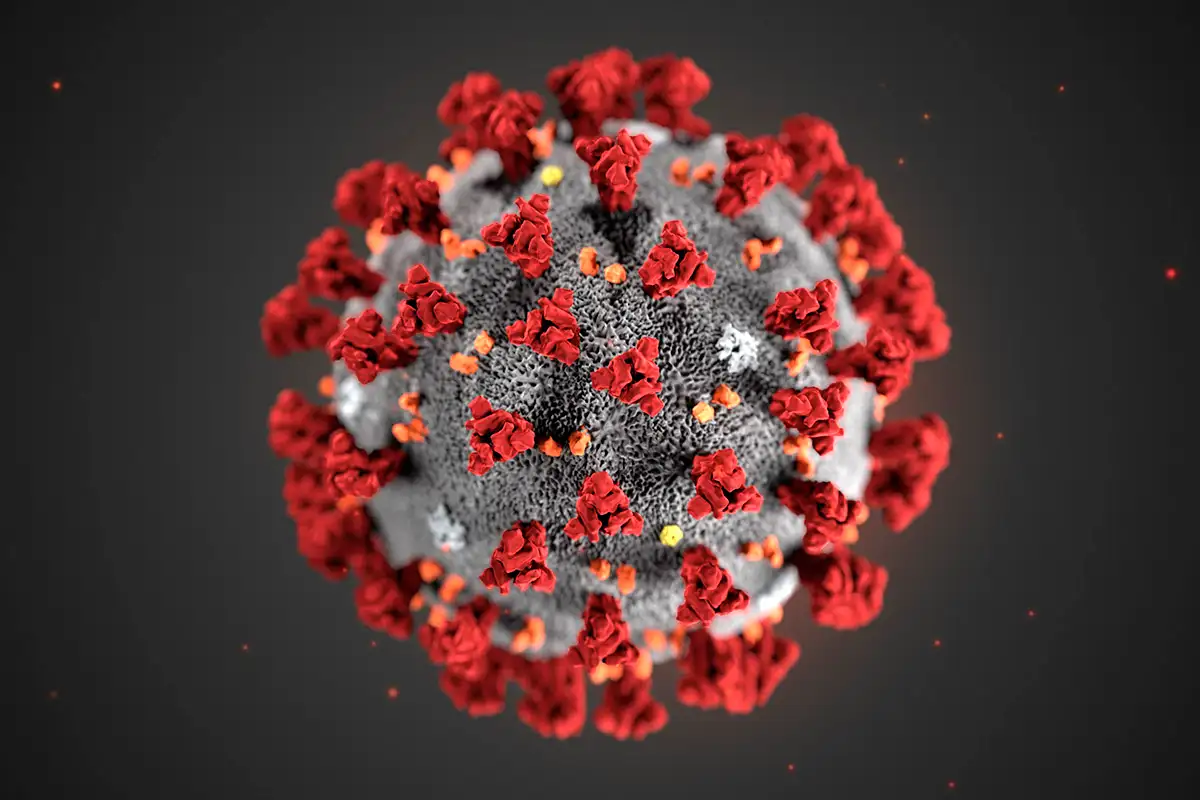

My goal is to provide a fun and intuitive display of the data behind covid. I will be using python 3, conda to manage my virtual enviroment and more.

#### Imports 

In [21]:
import pandas as pd 
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

#### Data  

The data I will be using is collected from the John Hopkins data repository off github (https://github.com/CSSEGISandData/COVID-19).

In [2]:
death_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
confirmed_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
recorved_df =  pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
country_df =  pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")

#### Data Frames 

A preview of the first four columns from each data frame.

In [3]:
death_df.head() 

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,446,451,471,478,491,504,546,548,569,581
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,36,36,36,36,37,38,39,42,43,44
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,751,760,767,777,788,799,811,825,837,845
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,52,52,52,52,52,52
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,5,6,6,6,6,7,8,8,9,9


In [4]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,853,853,853,853,854,854,855,855,855,855
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,130,138,140,142,148,155,166,172,176,183


In [5]:
recorved_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,3928,4201,4725,5164,5508,6158,7660,7962,8292,8764
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1034,1039,1044,1055,1064,1077,1086,1114,1126,1134
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,7322,7420,7606,7735,7842,7943,8078,8196,8324,8422
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,781,781,781,789,789,791,792,792,792,792
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,42,61,61,64,64,64,64,66,66,77


In [6]:
country_df.head()

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Australia,2020-06-23 00:33:26,-25.0000,133.0000,7492.0,102.0,6904.0,486.0,29.426898,NaN,NaN,1.361452,36,AUS
1,Austria,2020-06-23 00:33:26,47.5162,14.5501,17380.0,690.0,16241.0,449.0,192.973885,NaN,NaN,3.970081,40,AUT
2,Canada,2020-06-23 00:33:26,60.0010,-95.0010,103418.0,8494.0,65721.0,29203.0,273.190020,NaN,NaN,8.213270,124,CAN
3,China,2020-06-23 00:33:26,30.5928,114.3055,84610.0,4639.0,79536.0,435.0,6.023452,NaN,NaN,5.482803,156,CHN
4,Denmark,2020-06-23 00:33:26,56.2639,9.5018,12727.0,602.0,11547.0,578.0,219.726415,NaN,NaN,4.730101,208,DNK


#### Data Cleaning

I will rename all the country/region columns to just country for confirmed and deaths data frames.

In [7]:
confirmed_df = confirmed_df.rename(columns = {'Country/Region': 'country'})
death_df = death_df.rename(columns = {'Country/Region': 'country'})

#### Mortality Rates per Country 

This will display the top ten countries with the highest mortality rates

In [8]:
sorted_mortality_rates_df = country_df.sort_values('Mortality_Rate', ascending = False)
sorted_mortality_rates_df

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
185,Yemen,2020-06-23 00:33:26,15.552727,48.516388,967.0,257.0,350.0,360.0,3.242141,NaN,NaN,26.577042,887,YEM
116,MS Zaandam,2020-06-23 00:33:26,NaN,NaN,9.0,2.0,NaN,7.0,NaN,NaN,NaN,22.222222,8888,NaN
42,Belgium,2020-06-23 00:33:26,50.833300,4.469936,60550.0,9696.0,16771.0,34083.0,522.450442,NaN,NaN,16.013212,56,BEL
6,France,2020-06-23 00:33:26,46.227600,2.213700,197381.0,29666.0,74736.0,92979.0,302.390654,NaN,NaN,15.029815,250,FRA
10,Italy,2020-06-23 00:33:26,41.871900,12.567400,238720.0,34657.0,183426.0,20637.0,394.827626,NaN,NaN,14.517845,380,ITA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,Bhutan,2020-06-23 00:33:26,27.514200,90.433600,68.0,0.0,32.0,36.0,8.812719,NaN,NaN,0.000000,64,BTN
80,Fiji,2020-06-23 00:33:26,-17.713400,178.065000,18.0,0.0,18.0,0.0,2.007934,NaN,NaN,0.000000,242,FJI
172,Timor-Leste,2020-06-23 00:33:26,-8.874217,125.727539,24.0,0.0,24.0,0.0,1.820330,NaN,NaN,0.000000,626,TLS
76,Eritrea,2020-06-23 00:33:26,15.179400,39.782300,143.0,0.0,39.0,104.0,4.032227,NaN,NaN,0.000000,232,ERI


#### Hover over the for more details.

In [37]:
bubble_fig = px.scatter(sorted_mortality_rates_df.head(10), x='Country_Region', y='Mortality_Rate', size='Mortality_Rate', color='Country_Region', hover_name='Country_Region', title='Mortality Rates by Country')

bubble_fig.show()

In [39]:
bar_fig = px.bar(sorted_mortality_rates_df.head(10), x='Country_Region', y='Mortality_Rate', color='Country_Region', title='Mortality Rates by Country')
bar_fig.show()

In [11]:
def plot_cases_per_country(country):
    labels = ['confirmed', 'deaths']
    colors = ['blue', 'red']
    mode_size = [6, 8]
    line_size = [4, 5]
    
    df_list = [confirmed_df, death_df]
    
    fig = go.Figure();
    
    for i, df in enumerate(df_list):
        if country == 'World' or country == 'world':
            x_data = np.array(list(df.iloc[:, 20:].columns))
            y_data = np.sum(np.asarray(df.iloc[:,4:]),axis = 0)
            
        else:    
            x_data = np.array(list(df.iloc[:, 20:].columns))
            y_data = np.sum(np.asarray(df[df['country'] == country].iloc[:,20:]),axis = 0)
            
        fig.add_trace(go.Scatter(x=x_data, y=y_data, mode='lines+markers',
        name=labels[i],
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True,
        text = "Total " + str(labels[i]) +": "+ str(y_data[-1])
        ))
        
    fig.show()
    

plot_cases_per_country('US')
    

#### 10 worst hit countries - Confirmed cases

In [41]:
sorted_confirmed_cases = country_df.sort_values('Confirmed', ascending = False)
px.bar(
    sorted_confirmed_cases.head(10),
    x = "Country_Region",
    y = "Confirmed",
    title= "Top 10 worst affected countries", # the axis names
    color_discrete_sequence=["red"], 
    height=500,
    width=800
)